In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read data CSV Saas Sales

df_saas_sales = pd.read_csv('SaaS-Sales.csv')

df_saas_sales.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [3]:
# Memahami data menggunakan .info() untuk melihat tipe data setiap kolom
# Melihat apakah ada kolom yang tidak sesuai tipe datanya

df_saas_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [4]:
# Mengubah tipe data menjadi tipe data yang benar
# Order Date sebelumnya memiliki tipe data object, seharusnya Order Date memiliki tipe data datetime
# Order ID sebelumnya memiliki tipe data object, seharusnya Order ID memiliki tipe data int64

df_saas_sales['Order Date'] = pd.to_datetime(df_saas_sales['Order Date'])
df_saas_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   int64         
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   int64         
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   object        
 15  Sales         9994 non-null   float64 

In [5]:
# Memahami data menggunakan .describe()
# Untuk sekilas, datanya terdistribusi normal, karena mean dan mediannya

df_saas_sales.describe()

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
# Melihat apakah ada data Null, Duplicate atau N/A

print(f'Cek apakah ada data yang Null: \n{df_saas_sales.isnull().sum()}')
print(f'Cek apakah ada data yang duplicate: \n{df_saas_sales.duplicated().sum()}')
print(f'Cek apakah ada data yang N/A: \n{df_saas_sales.isna().sum()}')

Cek apakah ada data yang Null: 
Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64
Cek apakah ada data yang duplicate: 
0
Cek apakah ada data yang N/A: 
Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


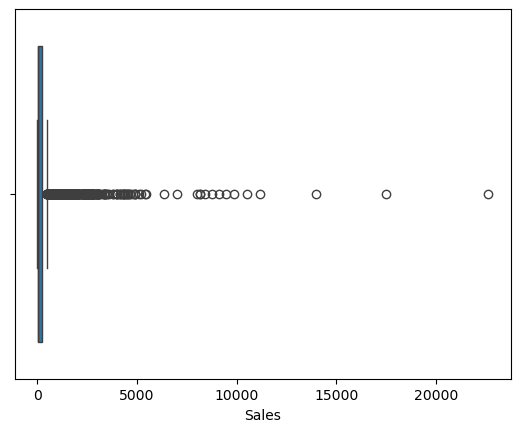

In [ ]:
# Melihat seberapa banyak data outlier dikolom Sales

df_saas_sales_boxplot = sns.boxplot(
    data = df_saas_sales['Sales'],
    orient = 'y'
)
plt.show(df_saas_sales_boxplot)

In [12]:
# Membersihkan data-data outlier dikolom Sales
# Dengan tujuan membuat supaya berdistribusi normal

q1_data = df_saas_sales['Sales'].quantile(q=0.25)
q3_data = df_saas_sales['Sales'].quantile(q=0.75)

interquartile_range = q3_data-q1_data

min_data = q1_data-(1.5*interquartile_range)
max_data = q3_data+(1.5*interquartile_range)
print(f"min={min_data} max={max_data}")

min=-271.71000000000004 max=498.93


In [17]:
# Ingin mengetahui jumlah data yang outlier dikolom Sales

print(df_saas_sales[df_saas_sales['Sales'] > max_data]['Sales'].count())
print(df_saas_sales[df_saas_sales['Sales'] < min_data]['Sales'].count())

1167
0


In [15]:
df_saas_sales_clean = df_saas_sales[df_saas_sales['Sales'] < max_data]['Sales']
print(len(df_saas_sales_clean))
df_saas_sales_clean.sort_values()

8827


4101      0.444
9292      0.556
8658      0.836
4711      0.852
2106      0.876
         ...   
8532    496.860
1774    497.610
7557    497.940
8338    498.000
5219    498.260
Name: Sales, Length: 8827, dtype: float64

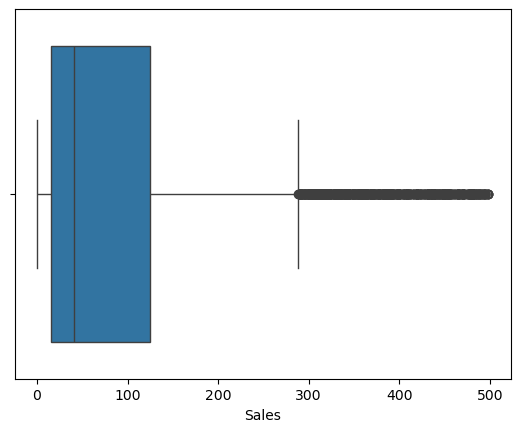

In [14]:
df_saas_sales_clean_boxplot = sns.boxplot(
    data = df_saas_sales_clean,
    orient = 'y'
)

plt.show(df_saas_sales_clean_boxplot)